In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten, Dense, Reshape
from tensorflow.keras.models import Model

In [2]:
# Load MNIST data to train autoencoder
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize to [0, 1] and reshape
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train shape:", x_train.shape)

Train shape: (60000, 28, 28, 1)


In [4]:
# add gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip to [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [6]:
# define fully connected autoencoder
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

fc_autoencoder = Model(input_img, decoded)

In [7]:
fc_autoencoder.compile(optimizer='adam', loss='mse')
fc_autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = fc_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0775 - val_loss: 0.0357
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0341 - val_loss: 0.0299
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0295 - val_loss: 0.0271
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0268 - val_loss: 0.0253
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0250 - val_loss: 0.0240
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0239 - val_loss: 0.0232
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0230 - val_loss: 0.0224
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0222 - val_loss: 0.0217
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0216 - val_loss: 0.0211
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0211 - val_loss: 0.0209
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0206 - val_loss: 0.0205
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━

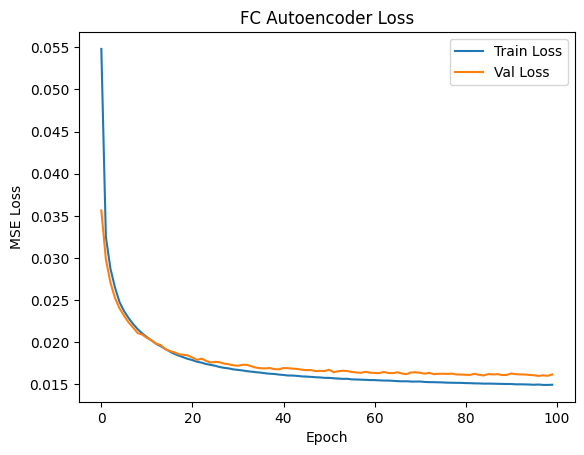

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('FC Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

### Part b

In [10]:
# generate new set of noisy test images (unseen during training)
noise_factor = 0.5
x_test_noisy_new = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy_new = np.clip(x_test_noisy_new, 0., 1.)

In [11]:
# predict on the new noisy test images
decoded_imgs = fc_autoencoder.predict(x_test_noisy_new[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


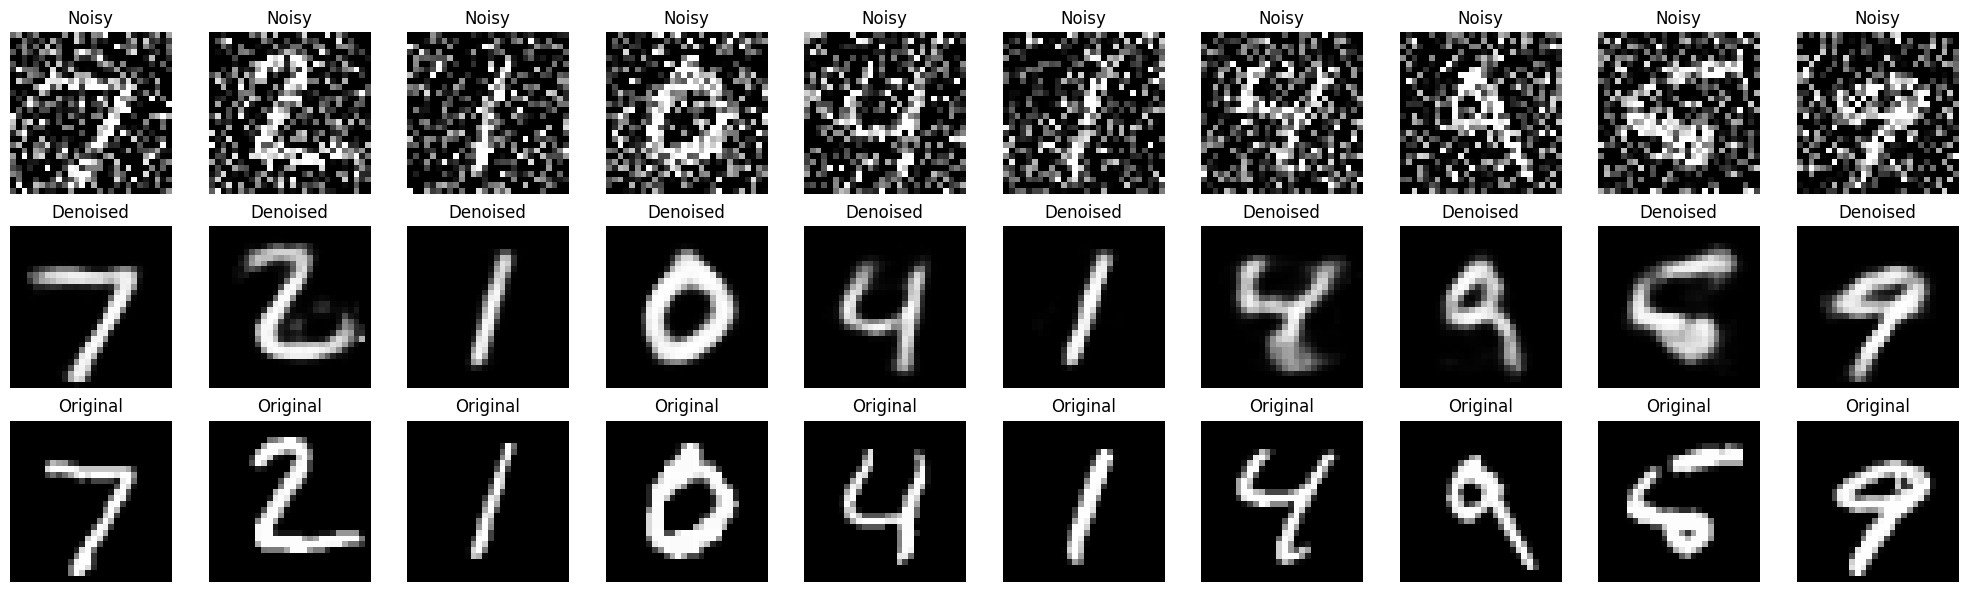

In [12]:
# display reconstructed images and their noisy input counterparts along with original images

n = 10  # number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Row 1: Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy_new[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Row 2: Denoised output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Row 3: original clean image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.tight_layout()
plt.show()